In [ ]:
#Logistic regression using sklearn
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, roc_auc_score, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, label_binarize, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression, Ridge, Lasso, LogisticRegressionCV
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import logit, probit, mnlogit
from itertools import cycle
sns.set_style('whitegrid')

In [ ]:
#Read bean data into a dataframe
df = pd.read_csv("Dry_Bean_Dataset.csv")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

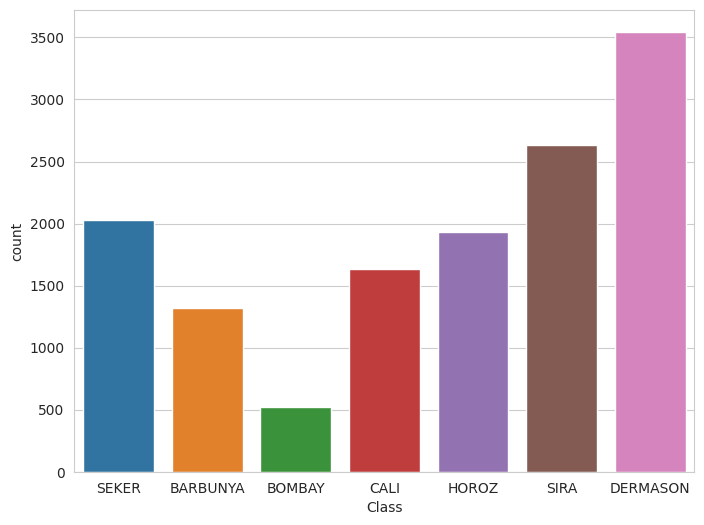

In [ ]:
#Read data frame  column names
df.columns

#Observe first 5 data instances
df.head()

#Find data shape
df.shape

#Find data variable type
df.info()

#Determine if NA values are present
df.isna().sum()

#Find number of instances of each class
df['Class'].value_counts()

#Plot above data
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Class')

# encoding
Class_mapping={'SEKER':6,'BARBUNYA':5,'BOMBAY':4,'CALI Class':3,'HOROZ':2,'SIRA':1, 'DERMASON':0}
df['Class']=df['Class'].map(Class_mapping)
print(df)

#Shuffle dataset
df = df.sample(frac=1).reset_index(drop=True)

#Observe predictor distribution
dis=df.describe().transpose()
dis

#Separate predictor and response variables
X=df.drop(['Class'],axis=1)

y=df[['Class']]

#Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)


In [ ]:
# Fit a Logistic Regression model to the multiclass train data
multiclass_logit_model = sm.MNLogit(y_train, sm.add_constant(X_train))
result = multiclass_logit_model.fit(method='newton')

# Evaluate the significance of the model and regression coefficients
print(result.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:2299: RuntimeWarning: overflow encountered in exp
  eXB = np.column_stack((np.ones(len(X)), np.exp(X)))
/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:2300: RuntimeWarning: invalid value encountered in true_divide
  return eXB/eXB.sum(1)[:,None]


Optimization terminated successfully.
         Current function value: nan
         Iterations 4
                          MNLogit Regression Results                          
Dep. Variable:                  Class   No. Observations:                 9527
Model:                        MNLogit   Df Residuals:                     9442
Method:                           MLE   Df Model:                           80
Date:                Sun, 30 Apr 2023   Pseudo R-squ.:                     nan
Time:                        15:52:50   Log-Likelihood:                    nan
converged:                       True   LL-Null:                       -15253.
Covariance Type:            nonrobust   LLR p-value:                       nan
        Class=1       coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const                  nan        nan        nan        nan         nan         nan
Area               

In [ ]:
# assuming y_train and y_test are the target variables in train and test data respectively
train_classes, train_counts = np.unique(y_train, return_counts=True)
test_classes, test_counts = np.unique(y_test, return_counts=True)

# create a dictionary to store the counts for each class
train_distribution = dict(zip(train_classes, train_counts))
test_distribution = dict(zip(test_classes, test_counts))

# create Pandas DataFrame to display the class distribution
train_df = pd.DataFrame(train_distribution.items(), columns=['Class', 'Count'])
test_df = pd.DataFrame(test_distribution.items(), columns=['Class', 'Count'])

print('Class distribution in train data:')
print(train_df)

print('\nClass distribution in test data:')
print(test_df)

Class distribution in train data:
   Class  Count
0      0    902
1      1    379
2      2   1116
3      3   2513
4      4   1360
5      5   1403
6      6   1854

Class distribution in test data:
   Class  Count
0      0    420
1      1    143
2      2    514
3      3   1033
4      4    568
5      5    624
6      6    782


In [ ]:
# fit logistic regression model
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs')
logreg.fit(X_train, y_train)

# print model summary
print("Model summary:\n", "-"*50)
print("Intercept:", logreg.intercept_)
print("Coefficients:", logreg.coef_)
print("Training accuracy:", logreg.score(X_train, y_train))
print("Test accuracy:", logreg.score(X_test, y_test))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model summary:
 --------------------------------------------------
Intercept: [-4.88654462e-05 -1.17154925e-04 -6.05319117e-05  1.46185300e-04
 -2.28394329e-05  7.07743279e-05  3.24320878e-05]
Coefficients: [[-6.46521346e-03 -1.29288032e-02 -1.07829399e-02 -2.77667870e-03
  -1.05043662e-04 -4.26015932e-05  6.75594856e-03 -5.73651757e-03
  -3.53974240e-05 -4.84778470e-05 -5.36757280e-05 -3.28520572e-05
  -5.35317080e-07 -1.02875820e-07 -2.20969285e-05 -4.77151348e-05]
 [-3.91192040e-03 -6.24708405e-02 -2.34418243e-02 -1.48558915e-02
  -1.85258711e-04 -8.69247288e-05  4.97439021e-03 -1.85487902e-02
  -8.67165794e-05 -1.15726359e-04 -1.02990027e-04 -9.41151067e-05
  -9.28587686e-07 -2.45804398e-07 -7.61938335e-05 -1.16772135e-04]
 [-3.22184671e-03 -2.44456931e-02 -4.84513616e-03 -8.09175787e-03
  -6.36109365e-05 -3.20823039e-05  3.72167549e-03 -7.03353598e-03
  -4.20496295e-05 -5.99251160e-05 -5.32391386e-05 -5.76443403e-05
  -5.46522627e-07 -2.08072723e-07 -5.40033688e-05 -6.12378578e-05

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Initialize the logistic regression model and fit it to the training data
log_reg = LogisticRegression(multi_class='ovr', solver='lbfgs')
log_reg.fit(X_train, y_train)

# Make predictions on the train and test data
y_train_pred = log_reg.predict(X_train)
y_test_pred = log_reg.predict(X_test)

# Calculate accuracy on the train and test data
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print the accuracy on the train and test data
print("Train accuracy:", train_accuracy)
print("Test accuracy:", test_accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Train accuracy: 0.873202477170148
Test accuracy: 0.8707149853085211


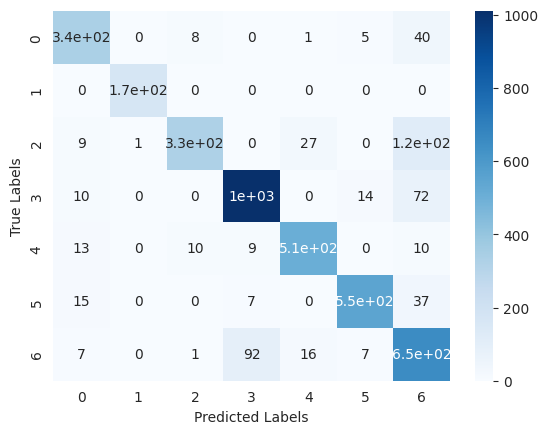

In [ ]:
# Calculate and plot the confusion matrix on the test data
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


In [ ]:
# Initialize a Decision Tree model with default hyperparameters
dt = DecisionTreeClassifier(random_state=42)

# Fit the model to the training data
dt.fit(X_train, y_train)

# Make predictions on the training data
y_train_pred = dt.predict(X_train)

# Evaluate performance on the training data
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f'Train accuracy: {train_accuracy:.3f}')

# Make predictions on the test data
y_test_pred = dt.predict(X_test)

# Evaluate performance on the test data
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test accuracy: {test_accuracy:.3f}')

# Print the height of the tree
print(f'Tree height: {dt.tree_.max_depth}')

Train accuracy: 1.000
Test accuracy: 0.893
Tree height: 28


In [ ]:
# Define a range of alpha values to search over
alphas = [0.001, 0.01, 0.1, 1, 10]

# Initialize a Decision Tree model
dt = DecisionTreeClassifier(random_state=42)

# Perform 10-fold cross-validation to find the optimal alpha value
grid_search = GridSearchCV(estimator=dt, param_grid={'ccp_alpha': alphas}, cv=10)
grid_search.fit(X_train, y_train)

# Print the optimal alpha value and corresponding mean cross-validated accuracy score
print(f'Optimal alpha: {grid_search.best_params_["ccp_alpha"]:.3f}')
print(f'Mean cross-validated accuracy: {grid_search.best_score_:.3f}')

# Build a pruned model using the optimal alpha value and the train data
dt_pruned = DecisionTreeClassifier(ccp_alpha=grid_search.best_params_['ccp_alpha'], random_state=42)
dt_pruned.fit(X_train, y_train)

# Make predictions on the training data
y_train_pred = dt_pruned.predict(X_train)

# Evaluate performance on the training data
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f'Train accuracy: {train_accuracy:.3f}')

# Make predictions on the test data
y_test_pred = dt_pruned.predict(X_test)

# Evaluate performance on the test data
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test accuracy: {test_accuracy:.3f}')

Optimal alpha: 0.001
Mean cross-validated accuracy: 0.904
Train accuracy: 0.919
Test accuracy: 0.906


In [ ]:
# Define a range of n_estimators values to search over
n_estimators = [10, 20, 30, 40, 50, 70, 100, 300, 500]

# Initialize a Decision Tree model
dt = DecisionTreeClassifier(random_state=42)

best_n_estimators = 0
best_test_accuracy = 0

# Train and evaluate the Bagging model for different values of n_estimators
for n in n_estimators:
    # Initialize a Bagging model with the Decision Tree as the base estimator
    bagging = BaggingClassifier(base_estimator=dt, n_estimators=n, random_state=42)
    bagging.fit(X_train, y_train)

    # Make predictions on the test data
    y_test_pred = bagging.predict(X_test)

    # Evaluate performance on the test data
    test_accuracy = accuracy_score(y_test, y_test_pred)
    print(f'n_estimators: {n}, Validation accuracy: {test_accuracy:.3f}')

    # Update the best n_estimators and corresponding validation accuracy
    if test_accuracy > best_test_accuracy:
        best_n_estimators = n
        best_val_accuracy = test_accuracy
# Train the Bagging model with the best n_estimators value and the full train data
bagging = BaggingClassifier(base_estimator=dt, n_estimators=best_n_estimators, random_state=42)
bagging.fit(X, y)

# Make predictions on the test data
y_test_pred = bagging.predict(X_test)

# Evaluate performance on the test data
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test accuracy: {test_accuracy:.3f}')

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


n_estimators: 10, Validation accuracy: 0.919


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


n_estimators: 20, Validation accuracy: 0.919


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


n_estimators: 30, Validation accuracy: 0.919


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


n_estimators: 40, Validation accuracy: 0.921


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


n_estimators: 50, Validation accuracy: 0.919


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


n_estimators: 70, Validation accuracy: 0.920


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


n_estimators: 100, Validation accuracy: 0.920


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


n_estimators: 300, Validation accuracy: 0.922


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


n_estimators: 500, Validation accuracy: 0.922


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Test accuracy: 1.000


In [ ]:
# Define the range of hyper-parameter values to be tested
num_trees_range = [10, 20, 30, 40, 50, 70, 100, 300, 500]

# Initialize lists to store the cross validation scores for each hyper-parameter value
cv_scores = []

# Iterate over the hyper-parameter values and perform 10-fold cross validation
for num_trees in num_trees_range:
    adaboost_model = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=num_trees)
    scores = cross_val_score(adaboost_model, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# Print the cross validation scores for each hyper-parameter value
for i in range(len(num_trees_range)):
    print("num_trees = %d, CV score = %.4f" % (num_trees_range[i], cv_scores[i]))

# Choose the best hyper-parameter value
best_num_trees = num_trees_range[cv_scores.index(max(cv_scores))]
print("Best hyper-parameter value: num_trees = %d" % best_num_trees)

# Train a decision tree with AdaBoost on the train data using the best hyper-parameter value
adaboost_model = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=best_num_trees)
adaboost_model.fit(X_train, y_train)

# Evaluate the performance of the model on the train and test data
train_accuracy = adaboost_model.score(X_train, y_train)
test_accuracy = adaboost_model.score(X_test, y_test)
print("Train accuracy: %.4f" % train_accuracy)
print("Test accuracy: %.4f" % test_accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarnin

num_trees = 10, CV score = 0.8959
num_trees = 20, CV score = 0.8967
num_trees = 30, CV score = 0.8960
num_trees = 40, CV score = 0.8963
num_trees = 50, CV score = 0.8955
num_trees = 70, CV score = 0.8943
num_trees = 100, CV score = 0.8953
num_trees = 300, CV score = 0.8964
num_trees = 500, CV score = 0.8962
Best hyper-parameter value: num_trees = 20


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Train accuracy: 1.0000
Test accuracy: 0.8937


In [ ]:
# Define the range of hyper-parameter values to be tested
num_trees = [10, 20, 30, 40, 50, 70, 100, 300, 500]
num_features = [1, 2, 3]

# Perform cross validation for each combination of hyper-parameters
best_score = 0
best_params = {}
for trees in num_trees:
    for features in num_features:
        rf_model = RandomForestClassifier(n_estimators=trees, max_features=features, random_state=0)
        scores = cross_val_score(rf_model, X_train, y_train, cv=10, scoring='accuracy')
        mean_score = scores.mean()
        if mean_score > best_score:
            best_score = mean_score
            best_params = {'n_estimators': trees, 'max_features': features}

# Train a decision tree with Random Forest on the train data using the best hyper-parameters
rf_model = RandomForestClassifier(n_estimators=best_params['n_estimators'], max_features=best_params['max_features'], random_state=0)
rf_model.fit(X_train, y_train)

# Evaluate the performance of the model on the train and test data
train_acc = rf_model.score(X_train, y_train)
test_acc = rf_model.score(X_test, y_test)

print("Best hyper-parameters:", best_params)
print("Train accuracy:", train_acc)
print("Test accuracy:", test_acc)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

Best hyper-parameters: {'n_estimators': 50, 'max_features': 3}
Train accuracy: 0.9996851054896609
Test accuracy: 0.922869735553379


In [ ]:
# Scale the train data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
y_train_scaled = scaler.fit_transform(y_train)
# Apply the same scaling to the test data
X_test_scaled = scaler.fit_transform(X_test)
y_test_scaled = scaler.fit_transform(y_test)

In [ ]:
# Fit logistic regression model with Ridge regularization
ridge_model = LogisticRegressionCV(penalty='l2', solver='liblinear', cv=10)
ridge_model.fit(X_train_scaled, y_train)
ridge_train_preds = ridge_model.predict(X_train_scaled)
ridge_test_preds = ridge_model.predict(X_test_scaled)

# Evaluate performance of Ridge model on train and test data
ridge_train_acc = accuracy_score(y_train, ridge_train_preds)
ridge_test_acc = accuracy_score(y_test, ridge_test_preds)
print('Ridge Model - Train Accuracy:', ridge_train_acc)
print('Ridge Model - Test Accuracy:', ridge_test_acc)

# Fit logistic regression model with LASSO regularization
lasso_model = LogisticRegressionCV(penalty='l1', solver='liblinear', cv=10)
lasso_model.fit(X_train_scaled, y_train)
lasso_train_preds = lasso_model.predict(X_train_scaled)
lasso_test_preds = lasso_model.predict(X_test_scaled)

# Evaluate performance of LASSO model on train and test data
lasso_train_acc = accuracy_score(y_train, lasso_train_preds)
lasso_test_acc = accuracy_score(y_test, lasso_test_preds)
print('LASSO Model - Train Accuracy:', lasso_train_acc)
print('LASSO Model - Test Accuracy:', lasso_test_acc)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Ridge Model - Train Accuracy: 0.9232707043140548
Ridge Model - Test Accuracy: 0.651077375122429


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:

LASSO Model - Train Accuracy: 0.9197018998635457
LASSO Model - Test Accuracy: 0.7091087169441724


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
# Perform 10-fold cross validation to find best value of k
cv_scores = []
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=10)
    cv_scores.append(scores.mean())

best_k = cv_scores.index(max(cv_scores)) + 1
print("Best value of k:", best_k)

# Train the model on scaled train data using best value of k
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train_scaled, y_train)

# Evaluate performance on scaled train data
y_train_pred = knn.predict(X_train_scaled)
train_acc = accuracy_score(y_train, y_train_pred)
print("Train accuracy:", train_acc)

# Evaluate performance on scaled test data
y_test_pred = knn.predict(X_test_scaled)
test_acc = accuracy_score(y_test, y_test_pred)
print("Test accuracy:", test_acc)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

Best value of k: 14
Train accuracy: 0.9288338406633778
Test accuracy: 0.9155239960822723


In [ ]:
# Define the range of values of C to perform cross validation over
c_values = [10**(-3), 10**(-1), 10**(1), 10**(3)]

# Perform 10-fold cross validation for each value of C and store the accuracy scores
acc_scores = []
for c in c_values:
    svm = LinearSVC(C=c, loss='hinge')
    scores = cross_val_score(svm, X_train_scaled, y_train, cv=10)
    acc_scores.append(scores.mean())

# Determine the best value of C based on the highest accuracy score
best_c = c_values[acc_scores.index(max(acc_scores))]
print("Best value of C:", best_c)

# Train the SVM with the best value of C on the scaled training data
svm = LinearSVC(C=best_c, loss='hinge')
svm.fit(X_train_scaled, y_train)

# Evaluate the performance of the SVM on the scaled training and test data
y_train_pred = svm.predict(X_train_scaled)
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Scaled Training Accuracy:", train_accuracy)

y_test_pred = svm.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Scaled Test Accuracy:", test_accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Best value of C: 10
Scaled Training Accuracy: 0.914033798677443
Scaled Test Accuracy: 0.761998041136141


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
# Define the values of C and gamma to be tested
C_range = [10**i for i in range(-3, 4)]
gamma_range = [10**i for i in range(-5, 4)]

# Create an empty list to store the cross validation scores
cv_scores = []

# Loop over the values of C and gamma to perform cross validation
for c in C_range:
    for g in gamma_range:
        svm_model = SVC(kernel='rbf', C=c, gamma=g)
        scores = cross_val_score(svm_model, X_train_scaled, y_train, cv=10)
        mean_score = np.mean(scores)
        cv_scores.append((c, g, mean_score))

# Find the values of C and gamma that gave the highest cross validation score
best_params = max(cv_scores, key=lambda x: x[2])
best_C = best_params[0]
best_gamma = best_params[1]

# Train the model with the best hyperparameters
svm_model = SVC(kernel='rbf', C=best_C, gamma=best_gamma)
svm_model.fit(X_train_scaled, y_train)

# Evaluate the performance on the scaled train and test data
train_pred = svm_model.predict(X_train_scaled)
test_pred = svm_model.predict(X_test_scaled)

train_acc = accuracy_score(y_train, train_pred)
test_acc = accuracy_score(y_test, test_pred)

print("Best C: ", best_C)
print("Best gamma: ", best_gamma)
print("Train accuracy: ", train_acc)
print("Test accuracy: ", test_acc)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Best C:  1000
Best gamma:  1
Train accuracy:  0.9407998320562612
Test accuracy:  0.8996082272282077
